In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('salary_prediction_data.csv')
data

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [4]:
numcols=['Experience','Age','Salary']
catcols=['Gender','Education','Location','Job_Title']

## univariate analysis

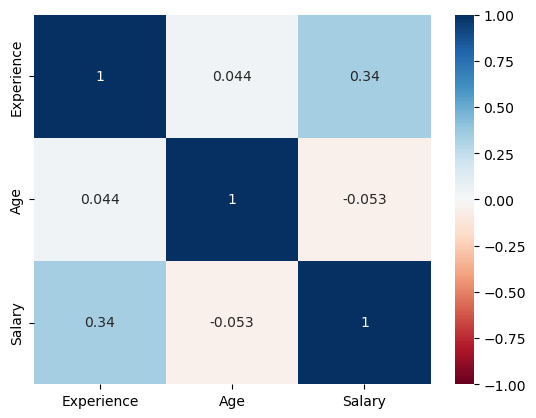

In [5]:
sns.heatmap(data.select_dtypes(exclude='object').corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True);

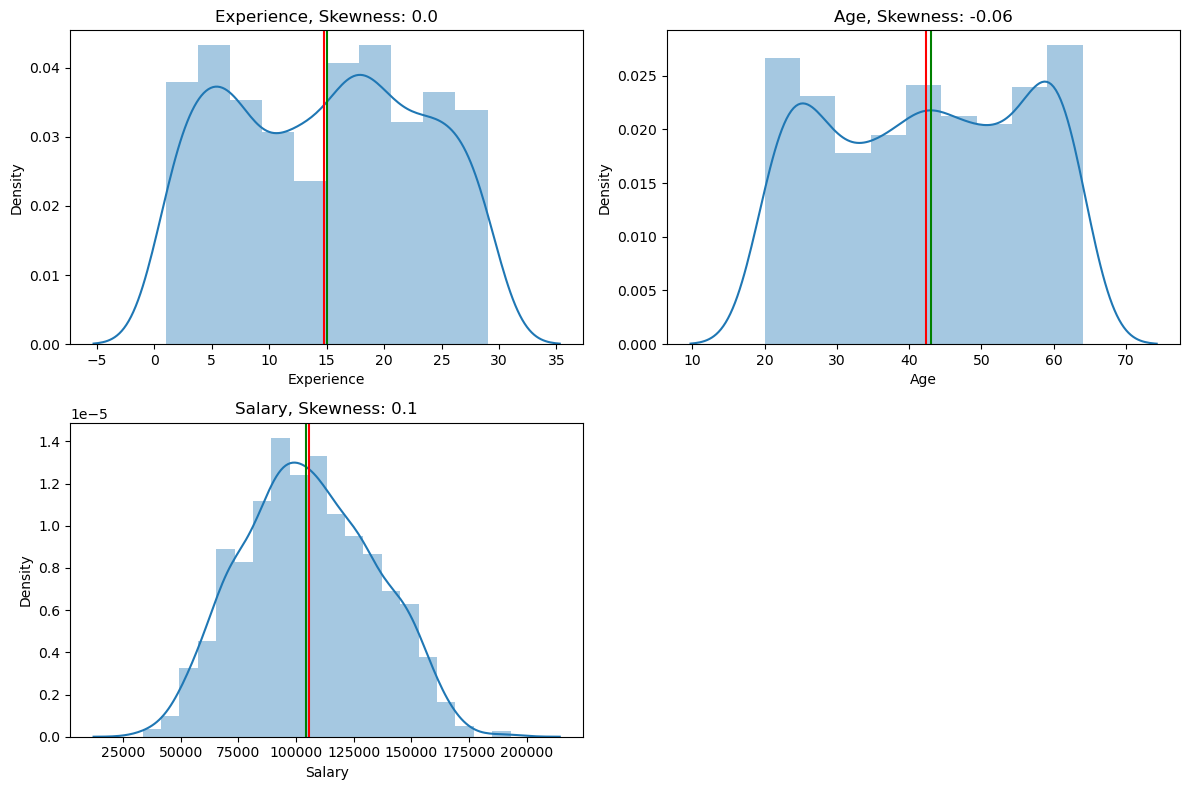

In [6]:
# numeric columns

plt.figure(figsize=(12,8))
t=1
for i in numcols:
    plt.subplot(2,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

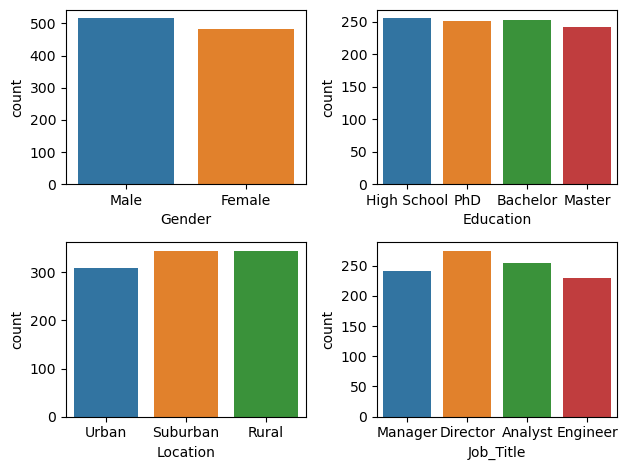

In [7]:
#categorical columns

t=1
for i in catcols:
    plt.subplot(2,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [8]:
data2= data.copy()

In [9]:
data2

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [10]:
data2['Gender']=np.where(data2['Gender']=='Male',1,0)

In [11]:
data2

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,1,84620.053665
1,PhD,11,Suburban,Director,59,1,142591.255894
2,Bachelor,28,Suburban,Manager,61,0,97800.255404
3,High School,29,Rural,Director,45,1,96834.671282
4,PhD,25,Urban,Analyst,26,0,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,0,64683.389864
996,High School,24,Urban,Engineer,30,0,74468.205020
997,Master,18,Rural,Analyst,44,1,98207.026024
998,Bachelor,27,Suburban,Director,31,0,108544.922720


In [12]:
job= {'Manager':3,
     'Director':4,
     'Analyst':1,
     'Engineer':2}
data2['Job_Title']=data2['Job_Title'].map(job)

In [13]:
edu={'PhD':4,
    'Master':3,
    'Bachelor':2,
    'High School':1}

data2['Education']=data2['Education'].map(edu)

In [14]:
loc={'Urban':1,
    'Suburban':2,
    'Rural':3}

data2['Location']=data2['Location'].map(loc)

In [15]:
data2

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,1,3,63,1,84620.053665
1,4,11,2,4,59,1,142591.255894
2,2,28,2,3,61,0,97800.255404
3,1,29,3,4,45,1,96834.671282
4,4,25,1,1,26,0,132157.786175
...,...,...,...,...,...,...,...
995,1,8,2,1,25,0,64683.389864
996,1,24,1,2,30,0,74468.205020
997,3,18,3,1,44,1,98207.026024
998,2,27,2,4,31,0,108544.922720


In [16]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [17]:
model2=sfa.ols('Salary ~ Education+Experience+Location+Job_Title+Age+Gender',data=data).fit()

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     645.5
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:26:19   Log-Likelihood:                -10616.
No. Observations:                1000   AIC:                         2.126e+04
Df Residuals:                     988   BIC:                         2.132e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 6.385e+04   1442.839     44.254      0.000     6.1e+04    6.67e+04
Education[T.High School] -1.804e+04    883.365    -20.424      0.000   -1.98e+04   -1.63e+04
Education[T.Master]       2.101e+04    899.617     23.357      0.000    1.92e+04    2.28e+04
Education[T.PhD]          4.006e+04    888.291     45.097      0.000    3.83e+04    4.18e+04
Location[T.Suburban]      3909.8369    764.625      5.113      0.000    2409.362    5410.312
Location[T.Urban]         9279.7916    783.752     11.840      0.000    7741.783    1.08e+04
Job_Title[T.Director]     2.538e+04    865.920     29.315      0.000    2.37e+04    2.71e+04
Job_Title[T.Engineer]     4821.0280    910.899      5.293      0.000    3033.509    6608.547
Job_Title[T.Manager]      1.578e+04    896.001     17.615      0.000     1.4e+04    1.75e+04
Gender[T.Male]             509.5985    631.756      0.807      0.420    -730.140    1749.337
Experience                1031.1875     38.013     27.128      0.000     956.593    1105.782
Age                         -9.9212     23.243     -0.427      0.670     -55.533      35.691
==============================================================================
Omnibus:                        4.533   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.596
Skew:                           0.117   Prob(JB):                        0.100
Kurtosis:                       3.236   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model=sfa.ols('Salary ~ Education+Experience+Location+Job_Title+Age+Gender',data=data2).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1155.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:26:19   Log-Likelihood:                -10629.
No. Observations:                1000   AIC:                         2.127e+04
Df Residuals:                     993   BIC:                         2.131e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.897e+04   1807.534     16.027      0.000    2.54e+04    3.25e+04
Education   1.959e+04    283.480     69.122      0.000     1.9e+04    2.02e+04
Experience  1019.0586     38.326     26.589      0.000     943.849    1094.269
Location   -4551.8269    394.819    -11.529      0.000   -5326.601   -3777.053
Job_Title   8711.2003    277.681     31.371      0.000    8166.292    9256.109
Age           -8.4715     23.450     -0.361      0.718     -54.490      37.547
Gender       609.7426    637.086      0.957      0.339    -640.448    1859.933
==============================================================================
Omnibus:                        1.307   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.246
Skew:                           0.086   Prob(JB):                        0.536
Kurtosis:                       3.023   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   int64  
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   int64  
 3   Job_Title   1000 non-null   int64  
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   int32  
 6   Salary      1000 non-null   float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 50.9 KB


### Model test for encoded data

In [23]:
# splitting data innto train and test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV

In [24]:
y= data2.Salary
x=data2.loc[:,['Education','Experience','Location','Job_Title','Age','Gender']]

In [25]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=1)

In [26]:
lr=LinearRegression()
pred_train= lr.fit(xtrain,ytrain).predict(xtrain)
pred_test=lr.fit(xtest,ytest).predict(xtest)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
rmse_train= np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test= np.sqrt(mean_squared_error(ytest,pred_test))

In [29]:
print(f'RMSE TRAIN: {rmse_train} \nRMSE TEST: {rmse_test}')

RMSE TRAIN: 10059.894361459214 
RMSE TEST: 9512.957762614478


### Cross Validation

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
lasso= Lasso()
param= {'alpha':[200,200.95,200.97,200.92,200.9]}
grid= GridSearchCV(estimator=lasso,param_grid=param, scoring='neg_root_mean_squared_error',cv=10)

In [32]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [200, 200.95, 200.97, 200.92, 200.9]},
             scoring='neg_root_mean_squared_error')

In [33]:
grid.best_params_

{'alpha': 200.9}

In [34]:
grid.best_score_

-10083.98248053699

In [35]:
# lasso after param tuning
lasso= Lasso(alpha=200.9,random_state=22)
lasso.fit(x,y)

Lasso(alpha=200.9, random_state=22)

<Axes: >

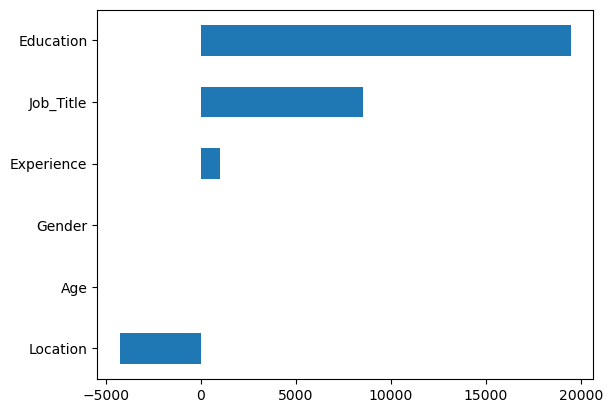

In [36]:
pd.Series(lasso.coef_,x.columns).sort_values().plot(kind='barh')

In [37]:
lasso= Lasso(alpha=200.9,random_state=0)

In [38]:
pred_lasso= lasso.fit(x,y).predict(x) # using lasso regression

In [39]:
np.sqrt(mean_squared_error(y,pred_lasso))

10010.287782200947

<Axes: >

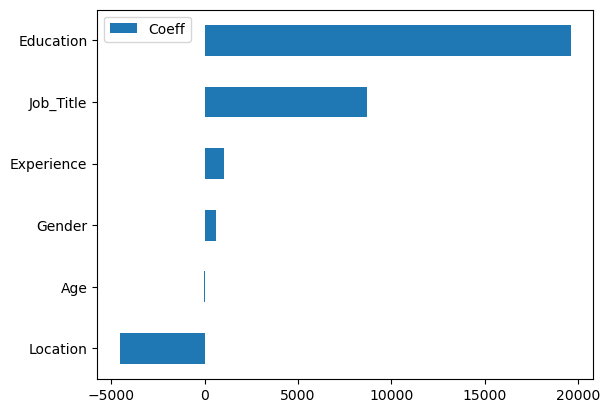

In [40]:
pd.DataFrame(model.params,index=x.columns,columns=['Coeff']).sort_values(by=['Coeff']).plot(kind='barh')

our linear regression model is absolutely correct as its giving correct weightage and significance to the needed predictor